### <center>Домашнее задание </center>

#### Задание
<div class="alert alert-block alert-info">
    
1. Загрузка текстового файла из корневого каталога.
2. Обработка текстовых данных.
3. Понижение размерности текстовых данных.
</div>

In [11]:
import numpy as np
import pandas as pd

pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

import re
import string
from collections import Counter
import gc

import spacy 
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!python -m spacy download en_core_web_lg

^C


In [2]:
#!python -m spacy download en_core_web_lg

#### Обработка текста

In [12]:
# Для векторизации с помощью spaCy нужна большая модель, 
# устанавливается через Anaconda Prompt: 
# python -m spacy download en_core_web_lg

nlp = spacy.load("en_core_web_lg")

In [13]:
def preproc(filename):
    '''
    Функция принимает название файла filename и возвращает:
    - список слов после удаления пунктуации и стоп-слов, лемматизации;
    - словарь уникальных слов (keys) и их частоту (values) с тексте.
    '''    
    with open(filename, encoding="utf8") as f:
        text = f.read()
    
    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    punctuations = string.punctuation

    doc = nlp(text)

    text_lemm = [word.lemma_.lower().strip() if 
                 word.lemma_ != "-PRON-" else 
                 word.lower_ for word in doc]
    
    text_clear = [word for word in text_lemm if 
                  word not in stop_words and 
                  word not in punctuations]
    
    count_words = Counter(text_clear)
    
    print('Количество слов в тексте: '
          '{}.'.format(len(text_clear)))
    print('Количество уникальных слов в тексте: '
          '{}.\n'.format(len(count_words)))
    
    return text_clear, count_words

In [14]:
with open("book.txt", encoding="utf8") as f:
        text = f.read()
doc = nlp(text)

In [15]:
text_lemm = [word.lemma_.lower().strip() if 
                 word.lemma_ != "-PRON-" else 
                 word.lower_ for word in doc]

In [123]:
len(text_lemm)

424

In [124]:
my_text, count_words = preproc('book.txt')

Количество слов в тексте: 176.
Количество уникальных слов в тексте: 127.



In [127]:
def get_word_vectors(words):
    '''
    Функция конвертирует список слов в их векторное представление
    '''
    ar = []
    for i in words:
        ar.append(nlp(i).vector)
    return ar

word_vector_list = get_word_vectors(my_text)

In [129]:
df = pd.DataFrame(word_vector_list)

In [162]:
df

,0,1,2,3,...,296,297,298,299
0,0.52928,4.9114,-5.23230,-1.828400,...,-1.091000,1.415000,-3.32830,-0.63650
1,-5.46380,1.3128,0.82809,-3.263100,...,-2.373800,-4.551000,-3.55800,4.10650
2,0.58298,3.2200,-4.16760,-2.005300,...,1.318200,-0.542140,-1.26300,1.63990
3,-1.35290,-1.5450,-0.45624,1.752800,...,0.027475,-1.869600,-0.90555,1.74430
4,0.50868,4.0256,-3.21580,2.383800,...,-0.938530,-0.078401,-3.88160,2.00710
...,...,...,...,...,...,...,...,...,...
171,0.29378,2.8193,-6.52430,-1.549500,...,-2.158400,2.137000,-5.88170,-4.36280
172,-0.51176,1.0594,-2.05140,-3.189700,...,0.548070,1.588300,-4.08860,-2.00680
173,2.24850,3.0178,-2.29470,0.009992,...,1.285800,2.512300,-2.79200,-3.26380
174,-0.51176,1.0594,-2.05140,-3.189700,...,0.548070,1.588300,-4.08860,-2.00680


Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

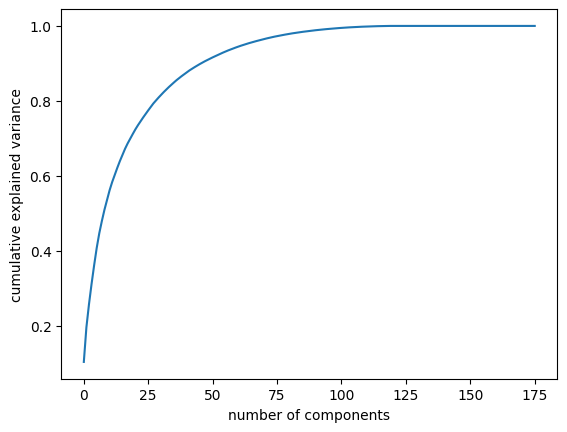

In [140]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Визуализация TSNE

In [149]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

X_tsne = tsne.fit_transform(df)


Text(0.5, 0, 'component 1')

Text(0, 0.5, 'component 2')

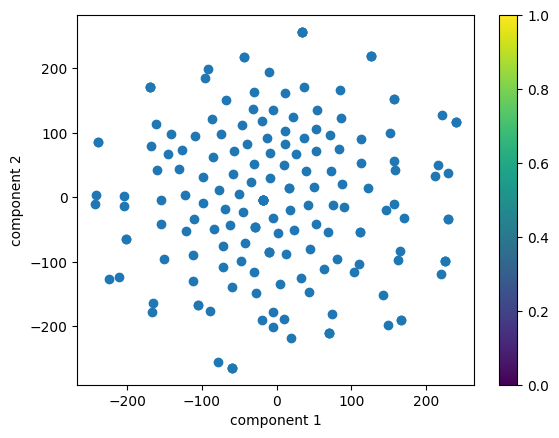

In [165]:
plt.scatter(x=X_tsne[:,0], y=X_tsne[:,1])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Визуализация PCA

In [166]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)


Text(0.5, 0, 'component 1')

Text(0, 0.5, 'component 2')

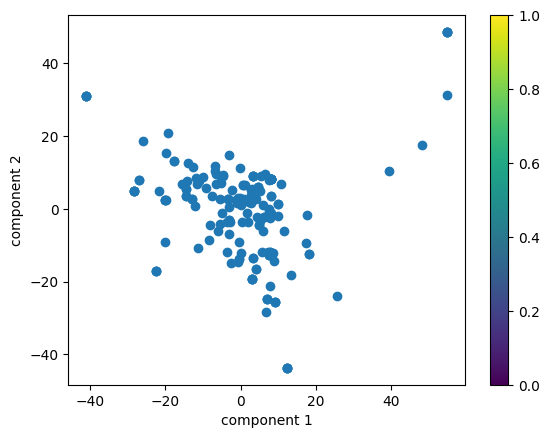

In [170]:
plt.scatter(x=X_pca[:,0], y=X_pca[:,1])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
